# Sinewave toy dataset

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

SEED = 42
np.random.seed(SEED)

The parameters to generate the dataset are:
- `n_features`: number of simple sine waves or covariates
- `n_samples`: number of samples
- `n_scale`: scale of the sine waves
- `std`: standard deviation of the noise

In [25]:
# Parameters
n_features = 5
n_samples = 1000
scale = 2
std = 0.1

# Generate the dataset
x = np.linspace(0, 2 * np.pi, n_samples)
data = np.array([np.sin((i*scale+1) * x) + np.random.normal(0, std, n_samples) for i in range(n_features)])
random_weights = np.random.rand(n_features)
target = np.dot(data.T, random_weights)

# Create a DataFrame
df = pd.DataFrame(data.T, columns=[f'Feature_{i+1}' for i in range(n_features)])
df['Target'] = target

# Display the first 5 rows
display(df.head())

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,0.002140,-0.106944,-0.201530,-0.064666,-0.020737,-0.194746
1,0.124342,-0.100112,0.104925,-0.068335,-0.014459,-0.053896
2,-0.060269,0.023911,0.215123,0.053167,0.197632,0.200465
3,0.087063,0.056903,0.075556,0.238114,0.217802,0.303860
4,-0.055556,-0.010437,0.140361,0.386702,0.314085,0.436162


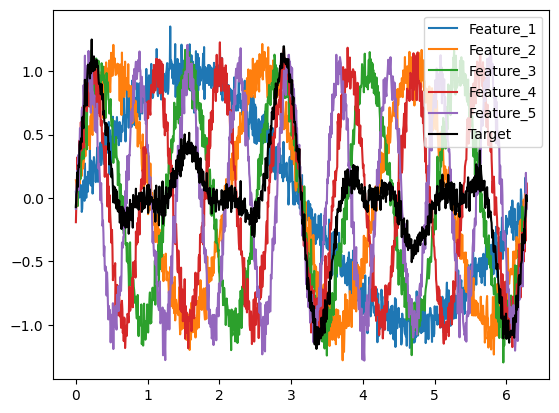

In [22]:
# Plot the dataset
fig, ax = plt.subplots()
for i in range(n_features):
    ax.plot(x, df[f'Feature_{i+1}'], label=f'Feature_{i+1}')
ax.plot(x, df['Target'], label='Target', color='black')
ax.legend()
plt.show()

In [ ]:
# Save the dataset
df.to_parquet('sinewave.parquet', index=False, compression='lz4')